In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors  

In [2]:
df = pd.read_csv("data/creditcard.csv")

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.shape

(284807, 31)

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
df['Class'].value_counts() / df['Class'].count() * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [8]:
df[df['Amount'] <= 0].shape

(1825, 31)

In [9]:
df = df[df['Amount'] > 0].reset_index().drop(['index'], axis=1)

In [10]:
df['Class'].value_counts()

0    282517
1       465
Name: Class, dtype: int64

In [11]:
df['Class'].value_counts() / df['Class'].count() * 100

0    99.835679
1     0.164321
Name: Class, dtype: float64

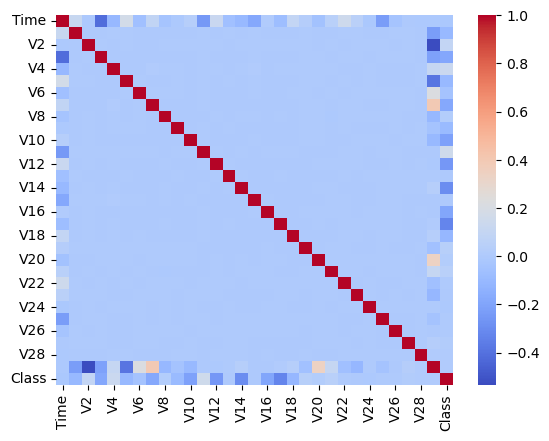

In [12]:
sns.heatmap(
    data = df.corr(),
    cmap = 'coolwarm'
);

In [13]:
date_time = pd.to_timedelta(df['Time'], unit = 's')
date_time

0        0 days 00:00:00
1        0 days 00:00:00
2        0 days 00:00:01
3        0 days 00:00:01
4        0 days 00:00:02
               ...      
282977   1 days 23:59:46
282978   1 days 23:59:47
282979   1 days 23:59:48
282980   1 days 23:59:48
282981   1 days 23:59:52
Name: Time, Length: 282982, dtype: timedelta64[ns]

In [14]:
df['Time Day'] = (date_time.dt.components.days).astype('int')
df['Time Hour'] = (date_time.dt.components.hours).astype('int')

In [15]:
df_fraud = df[df['Class'] == 1].reset_index(drop=True)

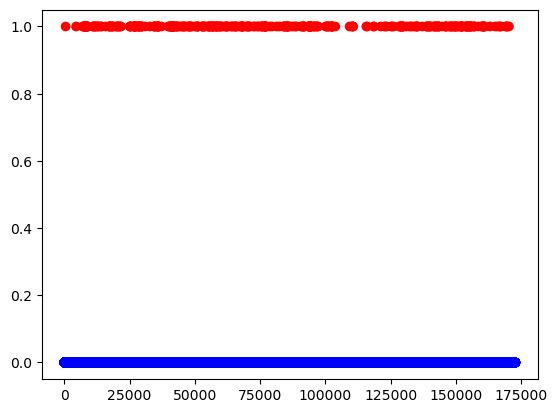

In [16]:
cmap = colors.ListedColormap(['blue', 'red'])
plt.scatter(
    x = df["Time"], 
    y = df["Class"], 
    c = df["Class"], 
    cmap = cmap
)

In [17]:
df_fraud['Time Day'].value_counts()

0    270
1    195
Name: Time Day, dtype: int64

/tmp/ipykernel_79160/967127969.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fraud[df_fraud['Time Day']==1]['Time Hour'].value_counts().append(pd.Series({5:0, 7:0})).sort_index(),


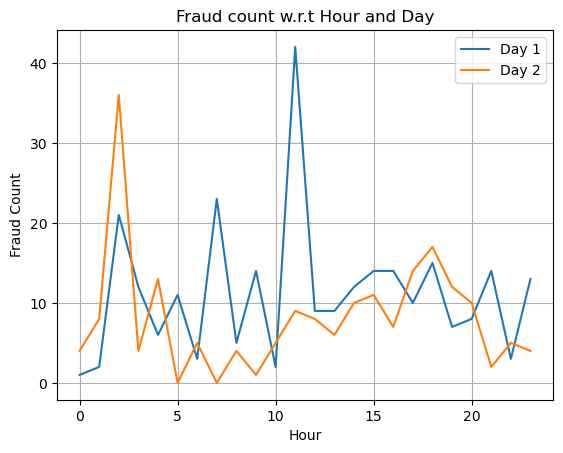

In [18]:
plt.plot(
    df_fraud[df_fraud['Time Day']==0]['Time Hour'].value_counts().sort_index(),
    label='Day 1'
)

plt.plot(
    df_fraud[df_fraud['Time Day']==1]['Time Hour'].value_counts().append(pd.Series({5:0, 7:0})).sort_index(),
    label='Day 2'
)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Fraud Count')
plt.title('Fraud count w.r.t Hour and Day')
plt.grid('True')
plt.show()

/tmp/ipykernel_79160/3309350498.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  height = df_fraud[df_fraud['Time Day']==1]['Time Hour'].value_counts().append(pd.Series({5:0, 7:0})).sort_index(),


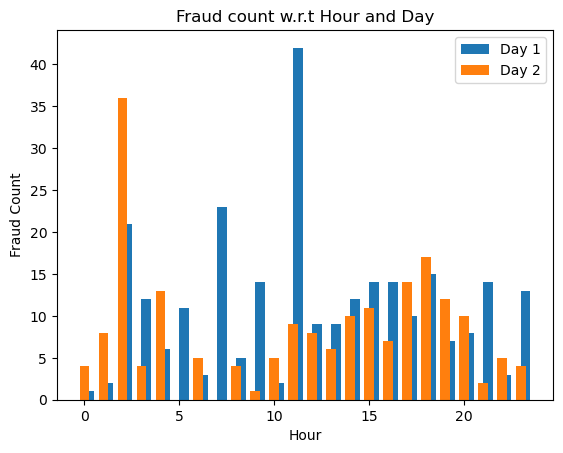

In [19]:
plt.bar(
    x = range(24),
    height = df_fraud[df_fraud['Time Day']==0]['Time Hour'].value_counts().sort_index(),
    label='Day 1',
    width = 0.5,
    align = 'edge'
)

plt.bar(
    x = range(24),
    height = df_fraud[df_fraud['Time Day']==1]['Time Hour'].value_counts().append(pd.Series({5:0, 7:0})).sort_index(),
    label='Day 2',
    width = 0.5
)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Fraud Count')
plt.title('Fraud count w.r.t Hour and Day')
plt.show()

/tmp/ipykernel_79160/2270657628.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fraud[df_fraud['Time Day']==1]['Time Hour'].value_counts().append(pd.Series({5:0, 7:0})).sort_index()],
/tmp/ipykernel_79160/2270657628.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fraud[df_fraud['Time Day']==1]['Time Hour'].value_counts().append(pd.Series({5:0, 7:0})).sort_index()],


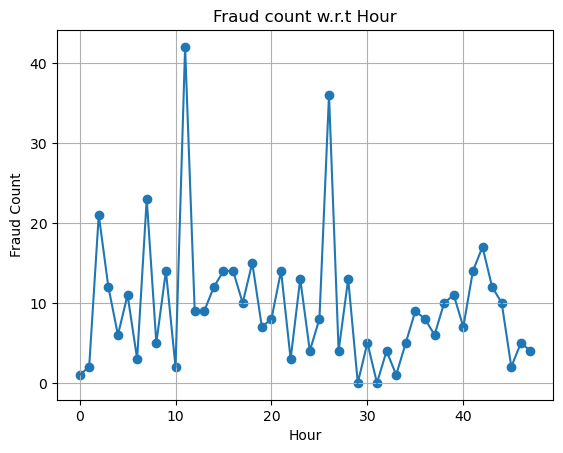

In [20]:
plt.plot(
    pd.concat(
        [df_fraud[df_fraud['Time Day']==0]['Time Hour'].value_counts().sort_index(),
        df_fraud[df_fraud['Time Day']==1]['Time Hour'].value_counts().append(pd.Series({5:0, 7:0})).sort_index()],
        axis = 0
    ).reset_index(drop=True)
)

plt.scatter(
    x = range(48),
    y = pd.concat(
        [df_fraud[df_fraud['Time Day']==0]['Time Hour'].value_counts().sort_index(),
        df_fraud[df_fraud['Time Day']==1]['Time Hour'].value_counts().append(pd.Series({5:0, 7:0})).sort_index()],
        axis = 0
    ).reset_index(drop=True),
)

plt.xlabel('Hour')
plt.ylabel('Fraud Count')
plt.title('Fraud count w.r.t Hour')
plt.grid('True')
plt.show()

In [21]:
df_fraud[df_fraud['Time Day']==0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time Day,Time Hour
0,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,0,0
1,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1,0,1
2,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1,0,1
3,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1,0,2
4,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,85573.0,-1.756712,3.266574,-4.153388,3.924526,-1.753772,-1.005787,-4.313217,1.560712,-3.295674,...,-0.367701,-0.776338,0.292094,0.026000,1.062968,0.501148,1.00,1,0,23
266,85576.0,-2.207631,3.259076,-5.436365,3.684737,-3.066401,-0.671323,-3.696178,1.822272,-3.049653,...,0.026754,-0.791489,0.176493,-0.136312,1.087585,0.373834,240.77,1,0,23
267,85864.0,-3.365265,2.928541,-5.660999,3.891160,-1.840375,-1.800887,-5.558679,2.402322,-2.848923,...,-0.606283,-0.743165,0.096319,-0.135060,1.238695,0.099824,1.00,1,0,23
268,85867.0,-3.586964,2.609127,-5.568577,3.631947,-4.543590,-0.157899,-4.089128,2.417305,-3.239901,...,0.182032,-0.534598,0.168933,-0.149844,0.685517,-0.299728,310.42,1,0,23


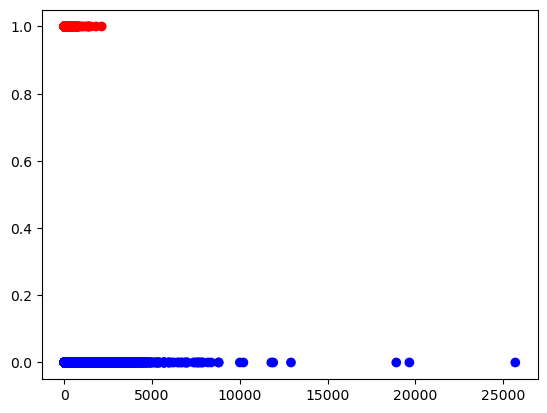

In [22]:
cmap = colors.ListedColormap(['blue', 'red'])
plt.scatter(
    x = df["Amount"], 
    y = df["Class"], 
    c = df["Class"], 
    cmap = cmap
)

/tmp/ipykernel_79160/1885779394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/tmp/ipykernel_79160/1885779394.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


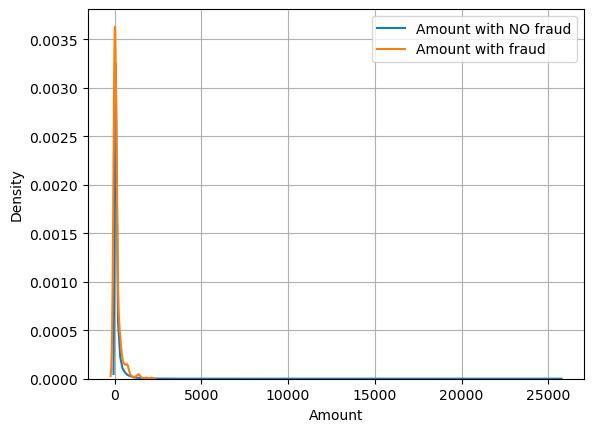

In [23]:
sns.distplot(
    df[df['Class'] == 0]['Amount'],
    hist = False,
    label = 'Amount with NO fraud'
)

sns.distplot(
    df[df['Class'] == 1]['Amount'],
    hist = False,
    label = 'Amount with fraud'
)

plt.legend()
plt.grid('True')
plt.show()

In [32]:
print("Min. fraud Amount = " + str(np.min(df_fraud['Amount'])))
print("Max. fraud Amount = " + str(np.max(df_fraud['Amount'])))

Min. fraud Amount = 0.01
Max. fraud Amount = 2125.87


/tmp/ipykernel_79160/3791475576.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


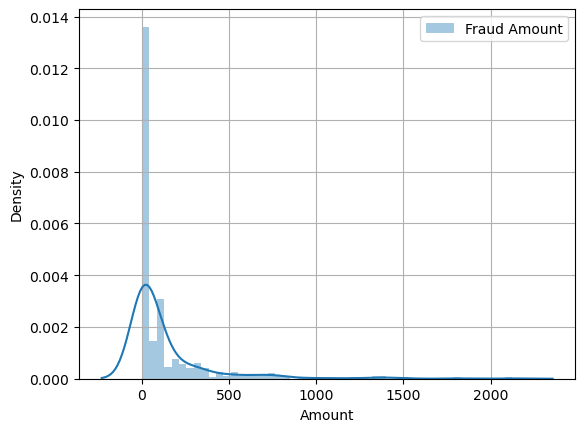

In [34]:
sns.distplot(
    df_fraud['Amount'],
    hist = True,
    label = 'Fraud Amount'
)

plt.legend()
plt.grid('True')
plt.show()

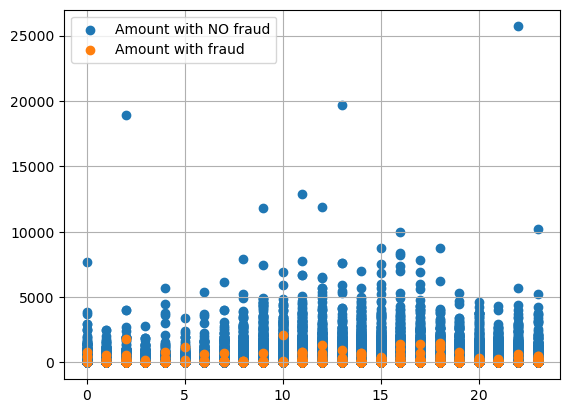

In [37]:
plt.scatter(
    x = df[df['Class'] == 0]['Time Hour'],
    y = df[df['Class'] == 0]['Amount'],
    label = 'Amount with NO fraud'
)

plt.scatter(
    x = df[df['Class'] == 1]['Time Hour'],
    y = df[df['Class'] == 1]['Amount'],
    label = 'Amount with fraud'
)

plt.legend()
plt.grid('True')
plt.show()

In [ ]:
sns.displot(df_fraud)